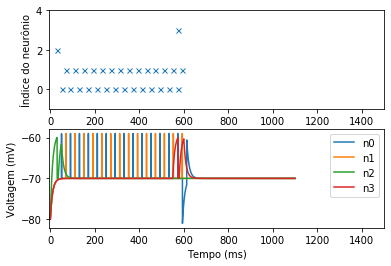

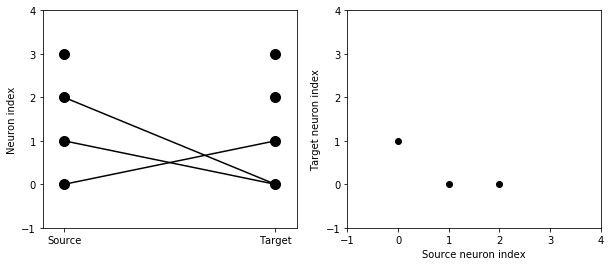

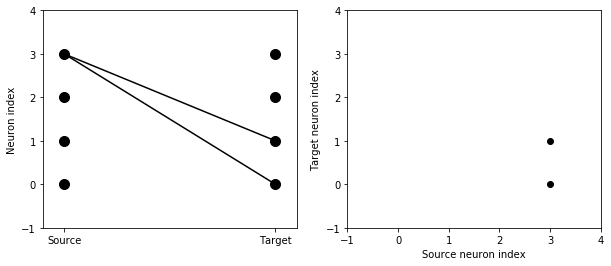

In [9]:
from brian2 import *
%matplotlib inline

N = 4 # Número de neurônios
vrest = -70.0*mV # Potencial de repouso
tau = 10*ms
R = 100*Mohm
w_exc = 11*mV # Peso sináptico
w_inh = -11*mV

# Modelo Leaky Integrate and Fire LIF
eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação dos neurônios
neurons = NeuronGroup(N, eqs, threshold = 'v > -60.0*mV', reset = 'v = vrest', refractory = 5*ms, method = 'linear')

#Valores iniciais de tensão e corrente na entrada dos neurônios
neurons.v = [-80, -80, -80, -80]*mV
neurons.I = [0, 0, 110, 0]*pA 

#Criação da sinapse excitatória
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w_exc', delay = 20*ms)
syn_ex.connect(i=0, j=1)
syn_ex.connect(i=1, j=0)
syn_ex.connect(i=2, j=0)

#Criação da sinapse inibitória
syn_in = Synapses(neurons, neurons, on_pre='v_post += w_inh', delay = 20*ms)
syn_in.connect(i=3, j=0)
syn_in.connect(i=3, j=1)

#Funções para extrair dados da simulação 
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

run (50*ms) # Simulação por 50 ms com corrente em n0 (exc), para depois zerar as correntes iniciais

neurons.I = [0, 0, 0, 0]*pA
run (500*ms) # Simulação sem corrente de estímulo, mantendo apenas a reverberação dos neurônios

neurons.I = [0, 0, 0, 110]*pA
run (50*ms) # Simulação por 50 ms com corrente em n3 (inh), para depois zerar as correntes

neurons.I = [0, 0, 0, 0]*pA
run (500*ms) # Simulação sem corrente de estímulo, mantendo apenas a reverberação dos neurônios

# Raster plot
subplot(211)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 1500)
ylim(-1, 4)

#subplot(312)
#plot(rate_mon.t/ms,rate_mon.rate/Hz)
#xlabel('Tempo (ms)')
#ylabel('Índice do neurônio')
#xlim(-5, 250)

# Tensão de disparos
subplot(212)
plot(state_mon.t/ms, state_mon.v[0]/mV, label="n0")
plot(state_mon.t/ms, state_mon.v[1]/mV, label="n1")
plot(state_mon.t/ms, state_mon.v[2]/mV, label="n2")
plot(state_mon.t/ms, state_mon.v[3]/mV, label="n3")
xlabel('Tempo (ms)')
ylabel('Voltagem (mV)')
xlim(-5, 1500)
legend()

show()


def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(syn_ex)
visualise_connectivity(syn_in)